In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(100)

plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
from sklearn.datasets import make_blobs

In [4]:
n_samples = 100
random_state = 100

X_noisy, _ = make_blobs(n_samples, n_features=2, centers=4, cluster_std=[1.0, 1.0, 1.0, 10.0], random_state=random_state)

X_clean, _ = make_blobs(n_samples, n_features=2, centers=3, cluster_std=1.0, random_state=random_state)

print(X_clean.shape, X_noisy.shape)

(100, 2) (100, 2)


In [5]:
def plot_data(x, 
              centers=None, 
              belongto=None, 
              color_list=list([]),
              ax=plt,
              y_label="feature_2",
              x_label="feature_1",
              title="KMeans"):
    ax.scatter(
        x[:, 0],
        x[:, 1],
        s=5,
        lw=10,
        c=belongto if belongto is not None else "black",
        cmap=matplotlib.colors.ListedColormap(color_list)
    )

    try:
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.title.set_text(title)
    except:
        ax.ylabel(y_label)
        ax.xlabel(x_label)
        ax.title(title)
    
    if centers is not None:
        ax.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="X",
            c=color_list,
            s=200,
            edgecolors="black",
        )

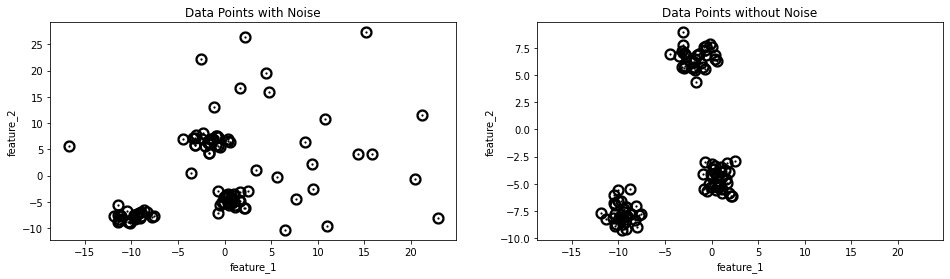

In [7]:
fig, ax_arr = plt.subplots(ncols=2, figsize=(16, 4), sharex=True)

plot_data(X_noisy, ax=ax_arr[0], title="Data Points with Noise")
plot_data(X_clean, ax=ax_arr[1], title="Data Points without Noise")

In [8]:
from KMeans import KMeans

In [9]:
## number of clusters
n_clusters = 3

## Noisy KMeans
kmeans_random = KMeans(
    n_centers=n_clusters, init="random", distance_metric="l2", max_itr=1000
)
kmeans_random.fit(X_noisy)

## Clean KMeans
kmeans_random_clean = KMeans(
    n_centers=n_clusters, init="random", distance_metric="l2", max_itr=1000
)
kmeans_random_clean.fit(X_clean)

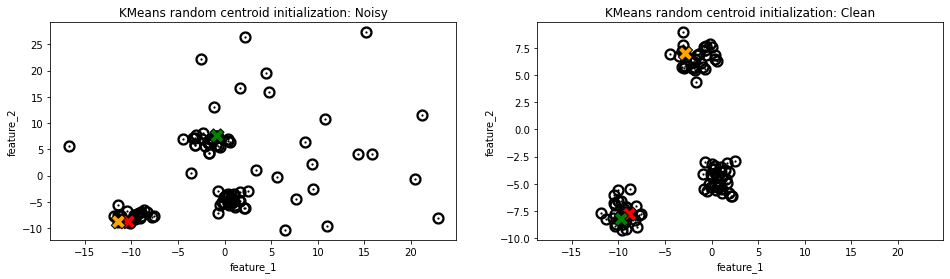

In [11]:
color_list = ["r", "g", "orange", "plum", "teal"][:n_clusters]
## Subplots for clean and noisy datasets
fig, ax_arr = plt.subplots(ncols=2, figsize=(16,4), sharex=True)
plot_data(
    X_noisy,
    kmeans_random.centers,
    color_list=color_list,
    ax=ax_arr[0],
    title="KMeans random centroid initialization: Noisy",
)

plot_data(
    X_clean,
    kmeans_random_clean.centers,
    color_list=color_list,
    ax=ax_arr[1],
    title="KMeans random centroid initialization: Clean",
)


Optimial point reached after 6 iterations
Optimial point reached after 3 iterations


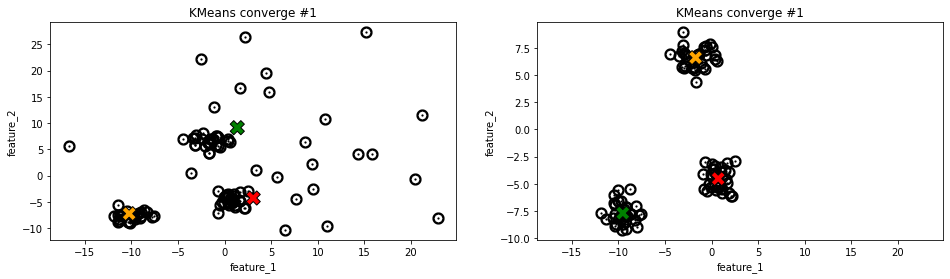

In [12]:
fig, ax_arr = plt.subplots(ncols=2, figsize=(16,4), sharex=True)

kmeans_random.converge()
plot_data(
    X_noisy, kmeans_random.centers, color_list=color_list, title="KMeans converge #1", ax=ax_arr[0]
)

kmeans_random_clean.converge()
plot_data(
    X_clean, kmeans_random_clean.centers, color_list=color_list, title="KMeans converge #1", ax=ax_arr[1]
)

In [13]:
from evaluation import calculate_silhouette_score

In [14]:
calculate_silhouette_score(X_noisy, kmeans_random.data_cluster)

0.5641900201812157

In [15]:
calculate_silhouette_score(X_clean, kmeans_random_clean.data_cluster)

0.8353147343303